In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime,timedelta
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("GlobalLandTemperaturesByState.csv")

In [8]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [12]:
df.shape

(645675, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [15]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [17]:
df.dropna(how="any",axis=0,inplace=True)

In [21]:
df.shape

(620027, 5)

In [24]:
df.rename(columns={'dt':'date','AverageTemperature':'avg_temp','AverageTemperatureUncertainty':'confidence_interval_temp'},inplace=True)

In [26]:
df.head()

,date,avg_temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [28]:
df["date"]=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='date', length=620027, freq=None)

In [29]:
df['year']=df.index.year

In [31]:
df.head()

,avg_temp,confidence_interval_temp,State,Country,year
date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 620027 entries, 1855-05-01 to 2013-08-01
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   avg_temp                  620027 non-null  float64
 1   confidence_interval_temp  620027 non-null  float64
 2   State                     620027 non-null  object 
 3   Country                   620027 non-null  object 
 4   year                      620027 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 28.4+ MB


In [35]:
latest_df=df.loc['1980':'2013']
latest_df

,avg_temp,confidence_interval_temp,State,Country,year
date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980
...,...,...,...,...,...
2013-04-01,15.710,0.461,Zhejiang,China,2013
2013-05-01,21.634,0.578,Zhejiang,China,2013
2013-06-01,24.679,0.596,Zhejiang,China,2013


In [38]:
latest_df[['Country','avg_temp']].groupby(['Country']).mean().sort_values('avg_temp')

,avg_temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


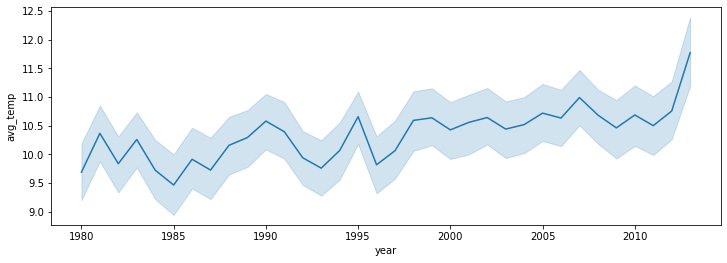

In [41]:
plt.figure(figsize=(12,4))
sns.lineplot(x='year',y='avg_temp',data=latest_df)
plt.show()

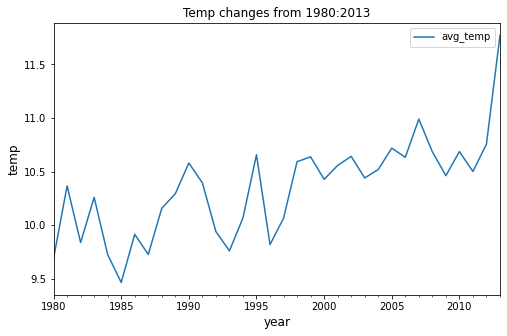

In [46]:
resample_df=latest_df[["avg_temp"]].resample('A').mean()
resample_df.plot(title='Temp changes from 1980:2013',figsize=(8,5))
plt.ylabel('temp',fontsize=12)
plt.xlabel('year',fontsize=12)
plt.legend()

In [49]:
from statsmodels.tsa.stattools import adfuller
print("Dickey fuller test results:")
test_df=adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test_statistics','p-value','lags_used','No_of_observation_used'])
for key,value in test_df[4].items():
    df_output['critical value(%s)'%key]=value
print(df_output)

Dickey fuller test results:
Test_statistics           -0.728209
p-value                    0.839307
lags_used                  2.000000
No_of_observation_used    31.000000
critical value(1%)        -3.661429
critical value(5%)        -2.960525
critical value(10%)       -2.619319
dtype: float64


In [50]:
decomp=seasonal_decompose(resample_df,freq=3)
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

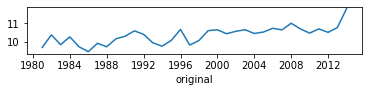

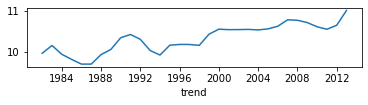

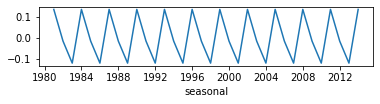

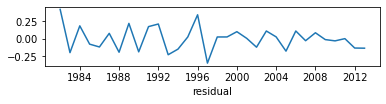

<Figure size 432x360 with 0 Axes>

In [51]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('residual')
plt.figure(figsize=(6,5))

plt.tight_layout()

In [60]:
rol_mean=resample_df.rolling(window=3,center=True).mean()
ewm=resample_df.ewm(span=3).mean()
rol_std=resample_df.rolling(window=3,center=True).std()

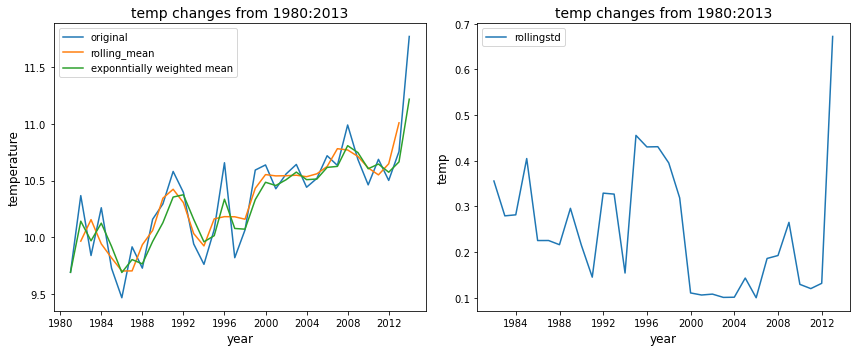

In [61]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
ax1.plot(resample_df,label='original')
ax1.plot(rol_mean,label='rolling_mean')
ax1.plot(ewm,label="exponntially weighted mean")
ax1.set_title("temp changes from 1980:2013",fontsize=14)
ax1.set_ylabel("temperature",fontsize=12)
ax1.set_xlabel('year',fontsize=12)
ax1.legend()

ax2.plot(rol_std,label='rollingstd')
ax2.set_title("temp changes from 1980:2013",fontsize=14)
ax2.set_ylabel('temp',fontsize=12)
ax2.set_xlabel('year',fontsize=12)
ax2.legend()
plt.tight_layout()
plt.show()

In [66]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)
print("Dickey Fuller test for rolling mean")
df_test=adfuller(rol_mean.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test statistics','p-value','lags used','No of observation used'])
for key,value in df_test[4].items():
    df_output['critical value(%s)'%key]=value
print(df_output)
print(' ')
print("Dickey Fuller test for the exponetially weighted mean:")
df_test=adfuller(ewm.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test statistics','p-value','lags used','No of observation used'])
for key,value in df_test[4].items():
    df_output['critical value(%s)'%key]=value
print(df_output)

Dickey Fuller test for rolling mean
Test statistics            0.275101
p-value                    0.976173
lags used                  8.000000
No of observation used    23.000000
critical value(1%)        -3.752928
critical value(5%)        -2.998500
critical value(10%)       -2.638967
dtype: float64
 
Dickey Fuller test for the exponetially weighted mean:
Test statistics           -0.338693
p-value                    0.919843
lags used                  2.000000
No of observation used    31.000000
critical value(1%)        -3.661429
critical value(5%)        -2.960525
critical value(10%)       -2.619319
dtype: float64


In [68]:
diff_rol_mean=resample_df-rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,avg_temp
date,
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199


In [70]:
diff_ewm=resample_df-ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,avg_temp
date,
1980-12-31,0.000000
1981-12-31,0.225574
1982-12-31,-0.129877
1983-12-31,0.136118
1984-12-31,-0.192797


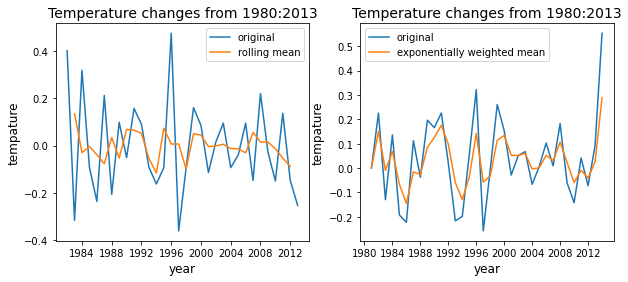

In [80]:
df_rol_mean_diff=diff_rol_mean.rolling(window=3,center=True).mean()
df_ewm_diff=diff_ewm.ewm(span=3).mean()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
ax1.plot(diff_rol_mean,label='original')
ax1.plot(df_rol_mean_diff,label='rolling mean')
ax1.set_title('Temperature changes from 1980:2013',fontsize=14)
ax1.set_ylabel('tempature',fontsize=12)
ax1.set_xlabel("year",fontsize=12)
ax1.legend()

ax2.plot(diff_ewm,label='original')
ax2.plot(df_ewm_diff,label='exponentially weighted mean')
ax2.set_title('Temperature changes from 1980:2013',fontsize=14)
ax2.set_ylabel('tempature',fontsize=12)
ax2.set_xlabel("year",fontsize=12)
ax2.legend()


In [84]:
print("Dickey Fuller test for the difference between original and rolling mean")
dftest=adfuller(diff_rol_mean.iloc[:,0].values,autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test statistics','p-value','lags used','No of observation used'])
for key,value in dftest[4].items():
    dfoutput['critical value(%s)'%key]=value
print(dfoutput)
print(' ')
print("Dickey Fuller test for thedifference between original and exponetially weighted mean:")
df_test=adfuller(diff_ewm.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(dftest[0:4],index=['Test statistics','p-value','lags used','No of observation used'])
for key,value in dftest[4].items():
    dfoutput['critical value(%s)'%key]=value
print(dfoutput)

Dickey Fuller test for the difference between original and rolling mean
Test statistics          -7.007710e+00
p-value                   7.051586e-10
lags used                 1.000000e+00
No of observation used    3.000000e+01
critical value(1%)       -3.669920e+00
critical value(5%)       -2.964071e+00
critical value(10%)      -2.621171e+00
dtype: float64
 
Dickey Fuller test for thedifference between original and exponetially weighted mean:
Test statistics          -7.007710e+00
p-value                   7.051586e-10
lags used                 1.000000e+00
No of observation used    3.000000e+01
critical value(1%)       -3.669920e+00
critical value(5%)       -2.964071e+00
critical value(10%)      -2.621171e+00
dtype: float64


In [91]:
latest_df.head()

,avg_temp,confidence_interval_temp,State,Country,year
date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [92]:
 !pip install pmdarima 

In [93]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [94]:
stepwise_fit=auto_arima(latest_df["avg_temp"],trace=True,supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=488135.429, Time=57.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=611614.206, Time=1.79 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=573298.223, Time=2.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=585724.280, Time=9.00 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=611612.206, Time=0.73 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=576149.708, Time=47.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=572115.953, Time=28.46 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=483197.703, Time=84.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=510745.426, Time=43.77 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=481991.343, Time=117.29 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=498518.323, Time=49.65 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=481113.775, Time=130.95 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=491136.103, Time=58.81 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=481752.253, Time=141

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                97424
Model:               SARIMAX(5, 1, 2)   Log Likelihood             -240441.842
Date:                Wed, 17 Aug 2022   AIC                         480899.684
Time:                        17:07:59   BIC                         480975.579
Sample:                             0   HQIC                        480922.743
                              - 97424                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3359      0.003    408.172      0.000       1.330       1.342
ar.L2         -0.5465      0.004   -137.266      0.000      -0.554      -0.539
ar.L3         -0.1353      0.004    -38.034      0.000      -0.142      -0.128
ar.L4          0.0127      0.003      3.942      0.000       0.006       0.019
ar.L5         -0.1334      0.003    -50.642      0.000      -0.139      -0.128
ma.L1         -1.5812      0.003   -560.540      0.000      -1.587      -1.576
ma.L2          0.7133      0.003    270.845      0.000       0.708       0.718
sigma2         8.1295      0.009    904.978      0.000       8.112       8.147
===================================================================================
Ljung-Box (L1) (Q):                   6.59   Jarque-Bera (JB):           5166383.78
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -2.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
from statsmodels.tsa.arima.model import ARIMA
print(latest_df.shape)
test=latest_df.iloc[48712:]
train=latest_df.iloc[:48712]
print(train.shape,test.shape)

(97424, 5)
(48712, 5) (48712, 5)


In [125]:
model=ARIMA(train['avg_temp'],order=(4,1,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               avg_temp   No. Observations:                48712
Model:                 ARIMA(4, 1, 3)   Log Likelihood             -120347.787
Date:                Wed, 17 Aug 2022   AIC                         240711.574
Time:                        17:38:13   BIC                         240781.924
Sample:                             0   HQIC                        240733.638
                              - 48712                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9137      0.048     19.128      0.000       0.820       1.007
ar.L2          0.2204      0.072      3.042      0.002       0.078       0.362
ar.L3         -0.4856      0.031    -15.831      0.000      -0.546      -0.425
ar.L4         -0.1759      0.010    -17.741      0.000      -0.195      -0.156
ma.L1         -1.1141      0.048    -23.368      0.000      -1.208      -1.021
ma.L2         -0.1447      0.081     -1.784      0.074      -0.304       0.014
ma.L3          0.4326      0.039     11.166      0.000       0.357       0.509
sigma2         8.3203      0.012    683.664      0.000       8.296       8.344
===================================================================================
Ljung-Box (L1) (Q):                  11.38   Jarque-Bera (JB):           3415246.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -2.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        43.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
pred.index=latest_df.index[start:end+1]
print(pred)

date
1997-05-01    21.215374
1997-06-01    20.618150
1997-07-01    20.527599
1997-08-01    20.840927
1997-09-01    21.541991
                ...    
2013-04-01    22.221031
2013-05-01    22.221031
2013-06-01    22.221031
2013-07-01    22.221031
2013-08-01    22.221031
Name: predicted_mean, Length: 48712, dtype: float64


<AxesSubplot:xlabel='date'>

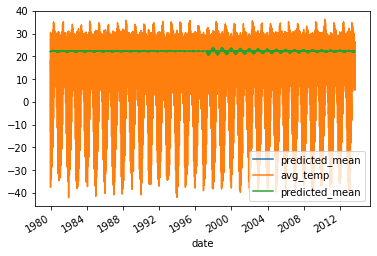

In [136]:
pred.plot(legend=True)
test["avg_temp"].plot(legend=True)
pred.plot(legend=True)


In [130]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rsme=sqrt(mean_squared_error(pred,test['avg_temp']))
print(rsme)

18.523885696705328
